In [1]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
#Get URL

w_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(w_url)

response.status_code

200

In [3]:
cmhf_1 = BeautifulSoup(response.content, 'lxml')
print(cmhf_1.title)
print(cmhf_1)

<title>Hall of Fame Members | Country Music Hall of Fame</title>
<!DOCTYPE html>
<html lang="en-US">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');</script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<link href="https://countrymusichalloffame.org/wp/xmlrpc.php" rel="pingback"/>
<!--[if lt IE 9]>
	<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>
	<script src="https://countrymusichalloffame.org/content/themes/bb-t

In [4]:
vcards_t = cmhf_1.find_all('div', attrs = {'class': 'vertical-card_content--title'})
vcards_t

[<div class="vertical-card_content--title">
 <h3>Roy Acuff</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Alabama</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Bill Anderson</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Eddy Arnold</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Chet Atkins</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Gene Autry</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>DeFord Bailey</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Bobby Bare</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Johnny Bond</h3>
 </div>]

In [5]:
vcards_c = cmhf_1.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
vcards_c[0].get_text()

'\n\n                    Inducted 1962                  \n'

In [6]:
artists = []
for i in range(len(vcards_t)):
    name = vcards_t[i].get_text().replace("\n", "")
    artists.append(name)
print(artists)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond']


In [7]:
inducted = []
for i in range(len(vcards_c)):
    ind = vcards_c[i].get_text().replace("\n", "").strip()
    year = re.sub("[^0-9]", "", ind)
    inducted.append(year)
print(inducted)

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']


In [8]:
cmfa1_tuples = list(zip(artists, inducted))
cmfa1_df = pd.DataFrame(cmfa1_tuples, columns = ["artist", "year_inducted"])
print(cmfa1_df)

          artist year_inducted
0      Roy Acuff          1962
1        Alabama          2005
2  Bill Anderson          2001
3    Eddy Arnold          1966
4    Chet Atkins          1973
5     Gene Autry          1969
6  DeFord Bailey          2005
7     Bobby Bare          2013
8    Johnny Bond          1999


In [64]:
url_temp = 'https://countrymusichalloffame.org/hall-of-fame/members/page/{}'
artists = []
inducted = []
web_address = []
for page in range(1,17):
    w_url = url_temp.format(page)
    response = requests.get(w_url)
    page_html = BeautifulSoup(response.content, 'lxml')
    vcards_t = page_html.find_all('div', attrs = {'class': 'vertical-card_content--title'})
    vcards_c = page_html.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
    vcards = page_html.find_all('div', class_='vertical-card_content') #Credit Teng
    for i in range(len(vcards_t)):
        name = vcards_t[i].get_text().replace("\n", "")
        artists.append(name)
    for i in range(len(vcards_c)):
        ind = vcards_c[i].get_text().replace("\n", "").strip()
        year = re.sub("[^0-9]", "", ind)
        inducted.append(year)
    for i in vcards: #Credit Teng
        link = i.a['href']
        web_address.append(link)
        
print(artists)
print(inducted)
print(web_address)


['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond', 'Bobby Braddock', 'Harold Bradley', 'Jerry Bradley', 'Owen Bradley', 'Rod Brasfield', 'Garth Brooks', 'Brooks & Dunn', 'Jim Ed Brown', 'Jim Ed Brown and the Browns', 'Boudleaux and Felice Bryant', 'Glen Campbell', 'Bill Carlisle', 'Carter Family', 'Johnny Cash', 'Roy Clark', 'Cowboy Jack Clement', 'Patsy Cline', 'Hank Cochran', 'Paul Cohen', 'Floyd Cramer', 'Vernon Dalhart', 'Charlie Daniels', 'Jimmie Davis', 'Jimmy Dean', 'Delmore Brothers', 'Jim Denny', 'Little Jimmy Dickens', 'Ralph Emery', 'The Everly Brothers', 'Flatt And Scruggs', 'Jim Foglesong', 'Red Foley', 'Tennessee Ernie Ford', 'Fred Foster', 'Joseph Frank', 'Lefty Frizzell', 'Connie B. Gay', 'Don Gibson', 'Vince Gill', 'Johnny Gimble', 'Merle Haggard', 'Tom T. Hall', 'Emmylou Harris', 'George D. Hay', 'Homer and Jethro', 'Roy Horton', 'Harlan Howard', 'Ferlin Husky', 'Alan Jackson', 'Sonny Jam

In [10]:
cmhf_tuples = list(zip(artists, inducted))
cmhf_df = pd.DataFrame(cmhf_tuples, columns = ["artist", "year_inducted"])
print(cmhf_df)
cmhf_df['year_inducted'] = cmhf_df['year_inducted'].astype('int')

            artist year_inducted
0        Roy Acuff          1962
1          Alabama          2005
2    Bill Anderson          2001
3      Eddy Arnold          1966
4      Chet Atkins          1973
..             ...           ...
135  Hank Williams          1961
136      Bob Wills          1968
137    Mac Wiseman          2014
138  Tammy Wynette          1998
139    Faron Young          2000

[140 rows x 2 columns]


(array([16., 15., 20., 21., 36., 32.]),
 array([1960, 1970, 1980, 1990, 2000, 2010, 2020]),
 <BarContainer object of 6 artists>)

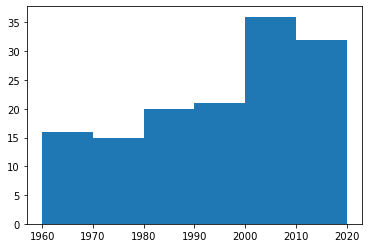

In [11]:
plt.hist(cmhf_df.year_inducted, bins = [1960, 1970, 1980, 1990, 2000, 2010, 2020])

## Bonus

In [12]:
url_names = []
for artist in artists:
    url_name = artist.replace('"', "").replace(".", "").replace(" ", "-").lower()
    url_names.append(url_name)
print(url_names)

['roy-acuff', 'alabama', 'bill-anderson', 'eddy-arnold', 'chet-atkins', 'gene-autry', 'deford-bailey', 'bobby-bare', 'johnny-bond', 'bobby-braddock', 'harold-bradley', 'jerry-bradley', 'owen-bradley', 'rod-brasfield', 'garth-brooks', 'brooks-&-dunn', 'jim-ed-brown', 'jim-ed-brown-and-the-browns', 'boudleaux-and-felice-bryant', 'glen-campbell', 'bill-carlisle', 'carter-family', 'johnny-cash', 'roy-clark', 'cowboy-jack-clement', 'patsy-cline', 'hank-cochran', 'paul-cohen', 'floyd-cramer', 'vernon-dalhart', 'charlie-daniels', 'jimmie-davis', 'jimmy-dean', 'delmore-brothers', 'jim-denny', 'little-jimmy-dickens', 'ralph-emery', 'the-everly-brothers', 'flatt-and-scruggs', 'jim-foglesong', 'red-foley', 'tennessee-ernie-ford', 'fred-foster', 'joseph-frank', 'lefty-frizzell', 'connie-b-gay', 'don-gibson', 'vince-gill', 'johnny-gimble', 'merle-haggard', 'tom-t-hall', 'emmylou-harris', 'george-d-hay', 'homer-and-jethro', 'roy-horton', 'harlan-howard', 'ferlin-husky', 'alan-jackson', 'sonny-james'

In [24]:
#url_names[url_names.str.contains("\"")]
url_names2 = []

for name in url_names:
    new_name = name.replace("\u200bjerry-reed", "\%E2\%80\%8Bjerry-reed")
    new_name2 = new_name.replace("hargus-“pig”-robbins", "hargus-pig-robbins")
    new_name3 = new_name2.replace("ernest-v-“pop”-stoneman", "ernest-v-pop-stoneman")
    new_name4 = new_name3.replace("e-w-“bud”-wendell", "e-w-bud-wendell")
    url_names2.append(new_name4)

print(url_names2)

['roy-acuff', 'alabama', 'bill-anderson', 'eddy-arnold', 'chet-atkins', 'gene-autry', 'deford-bailey', 'bobby-bare', 'johnny-bond', 'bobby-braddock', 'harold-bradley', 'jerry-bradley', 'owen-bradley', 'rod-brasfield', 'garth-brooks', 'brooks-&-dunn', 'jim-ed-brown', 'jim-ed-brown-and-the-browns', 'boudleaux-and-felice-bryant', 'glen-campbell', 'bill-carlisle', 'carter-family', 'johnny-cash', 'roy-clark', 'cowboy-jack-clement', 'patsy-cline', 'hank-cochran', 'paul-cohen', 'floyd-cramer', 'vernon-dalhart', 'charlie-daniels', 'jimmie-davis', 'jimmy-dean', 'delmore-brothers', 'jim-denny', 'little-jimmy-dickens', 'ralph-emery', 'the-everly-brothers', 'flatt-and-scruggs', 'jim-foglesong', 'red-foley', 'tennessee-ernie-ford', 'fred-foster', 'joseph-frank', 'lefty-frizzell', 'connie-b-gay', 'don-gibson', 'vince-gill', 'johnny-gimble', 'merle-haggard', 'tom-t-hall', 'emmylou-harris', 'george-d-hay', 'homer-and-jethro', 'roy-horton', 'harlan-howard', 'ferlin-husky', 'alan-jackson', 'sonny-james'

In [41]:
#Access individual artist page information

w_url = 'https://countrymusichalloffame.org/artist/charley-pride/'
response = requests.get(w_url)
page_html = BeautifulSoup(response.content, 'lxml')
deets = page_html.find_all('p')
deets[5].get_text()

'Birth: March 18, 1934  Birthplace: Sledge, Mississippi '

In [52]:
#Access individual artist page information

w_url = 'https://countrymusichalloffame.org/artist/frances-preston/'
response = requests.get(w_url)
soup = BeautifulSoup(response.content, 'html.parser')
soup.find_all("Birth")
#deets = page_html.find_all('p', string = "Birth")
#deets[5].get_text()


[]

In [45]:
artist_page = 'https://countrymusichalloffame.org/artist/{artist_name}/'
artist_tombstones = []
for artist in url_names2:
    w_url = artist_page.format(artist_name = artist)
    response = requests.get(w_url)
    page_html = BeautifulSoup(response.content, 'lxml')
    deets = page_html.find_all('p')
    tombstone = deets[5].get_text()
    artist_tombstones.append(tombstone)

print(artist_tombstones)

['Birth: September 15, 1903 - Death: November 23, 1992  Birthplace: Maynardville, Tennessee ', 'Between 1980 and 1993, this family-based act took more than thirty records to the top of the\xa0Billboard\xa0country charts and sold millions of albums, substantially broadening country’s audience and making themselves one of American music’s most popular acts of all time.\n', 'Birth: November 1, 1937  Birthplace: Columbia, South Carolina ', 'Birth: May 15, 1918 - Death: May 8, 2008  Birthplace: Henderson, Tennessee ', 'Birth: June 20, 1924 - Death: June 30, 2001  Birthplace: Luttrell, Tennessee ', 'Birth: September 29, 1907 - Death: October 2, 1998  Birthplace: Tioga, Texas ', 'Birth: December 14, 1899 - Death: July 2, 1982  Birthplace: Smith County, Tennessee ', 'Birth: April 7, 1935  Birthplace: Lawrence County, Ohio ', 'Birth: June 1, 1915 - Death: June 12, 1978  Birthplace: Enville, Oklahoma ', 'Birth: August 5, 1940  Birthplace: Lakeland, Florida ', 'Birth: January 2, 1926  Birthplace:

In [46]:
cmhf_df['tombstone'] = artist_tombstones
print(cmhf_df)

            artist  year_inducted  \
0        Roy Acuff           1962   
1          Alabama           2005   
2    Bill Anderson           2001   
3      Eddy Arnold           1966   
4      Chet Atkins           1973   
..             ...            ...   
135  Hank Williams           1961   
136      Bob Wills           1968   
137    Mac Wiseman           2014   
138  Tammy Wynette           1998   
139    Faron Young           2000   

                                             tombstone  
0    Birth: September 15, 1903 - Death: November 23...  
1    Between 1980 and 1993, this family-based act t...  
2    Birth: November 1, 1937  Birthplace: Columbia,...  
3    Birth: May 15, 1918 - Death: May 8, 2008  Birt...  
4    Birth: June 20, 1924 - Death: June 30, 2001  B...  
..                                                 ...  
135  Birth: September 17, 1923 - Death: January 1, ...  
136  Birth: March 6, 1905 - Death: May 13, 1975  Bi...  
137  Birth: May 23, 1925 - Death: February

In [47]:
cmhf_df['tombstone'][1]

'Between 1980 and 1993, this family-based act took more than thirty records to the top of the\xa0Billboard\xa0country charts and sold millions of albums, substantially broadening country’s audience and making themselves one of American music’s most popular acts of all time.\n'

In [13]:
#testing whether I can use a function to get rid of these dang quotation marks. Conclusion: I should be able to. Should.

pop = "pop \"n\" lock"
print(pop)
new_pop = pop.replace('"', "")
print(new_pop)

pop "n" lock
pop n lock


In [14]:
start_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(start_url)

soup = BeautifulSoup(response.content, 'lxml')

soup.select("a[href*=artist]")

#.find_all('a', href = True)
#cards[0].find_all('a', href = True)


[<a href=" https://countrymusichalloffame.org/artist/roy-acuff/ ">
 <div class="vertical-cards-col">
 <div class="vertical-card">
 <div class="vertical-card_image">
 <div class="vertical-card_image-container" style="background: url('https://cmhof.imgix.net/content/uploads/2019/03/11072232/Acuff_Roy.jpg');"></div>
 </div>
 <div class="vertical-card_content">
 <div class="vertical-card_content--title">
 <h3>Roy Acuff</h3>
 </div>
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1962                  </p>
 </div>
 <div class="fbyf-btn-wrapper inline-text">
 <a href="https://countrymusichalloffame.org/artist/roy-acuff/">
 <span>Learn More</span>
 <svg height="15px" version="1.1" viewbox="0 0 15 15" width="15px" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
 <g fill="none" fill-rule="evenodd" id="Symbols" stroke="none" stroke-width="1">
 <g id="Icon/CMHOF/arrow-right">
 <rect height="15" id="Rectangle" width="15" x="0" y="0"></re

In [54]:
b_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(b_url)
soup = BeautifulSoup(response.content, 'lxml')

d = soup.find_all('div', class_='vertical-card_content')
d

web_address = []

for element in d:
    link = element.a['href']
    web_address.append(link)

print(web_address)

['https://countrymusichalloffame.org/artist/roy-acuff/', 'https://countrymusichalloffame.org/artist/alabama/', 'https://countrymusichalloffame.org/artist/bill-anderson/', 'https://countrymusichalloffame.org/artist/eddy-arnold/', 'https://countrymusichalloffame.org/artist/chet-atkins/', 'https://countrymusichalloffame.org/artist/gene-autry/', 'https://countrymusichalloffame.org/artist/deford-bailey/', 'https://countrymusichalloffame.org/artist/bobby-bare/', 'https://countrymusichalloffame.org/artist/johnny-bond/']


In [63]:
url_temp = 'https://countrymusichalloffame.org/hall-of-fame/members/page/{}'

web_address = []
for page in range(1,17):
    w_url = url_temp.format(page)
    response = requests.get(w_url)
    soup = BeautifulSoup(response.content, 'lxml')
#     vcards_t = soup.find_all('div', attrs = {'class': 'vertical-card_content--title'})
#     vcards_c = soup.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
    d = soup.find_all('div', class_='vertical-card_content') #Credit Teng
#     for i in range(len(vcards_t)):
#         name = vcards_t[i].get_text().replace("\n", "")
#         artists.append(name)
#     for i in range(len(vcards_c)):
#         ind = vcards_c[i].get_text().replace("\n", "").strip()
#         year = re.sub("[^0-9]", "", ind)
#         inducted.append(year)
    for i in d: #Credit Teng
        link = i.a['href']
        web_address.append(link)
        
# print(artists)
# print(inducted)
print(web_address)

['https://countrymusichalloffame.org/artist/roy-acuff/', 'https://countrymusichalloffame.org/artist/alabama/', 'https://countrymusichalloffame.org/artist/bill-anderson/', 'https://countrymusichalloffame.org/artist/eddy-arnold/', 'https://countrymusichalloffame.org/artist/chet-atkins/', 'https://countrymusichalloffame.org/artist/gene-autry/', 'https://countrymusichalloffame.org/artist/deford-bailey/', 'https://countrymusichalloffame.org/artist/bobby-bare/', 'https://countrymusichalloffame.org/artist/johnny-bond/', 'https://countrymusichalloffame.org/artist/bobby-braddock/', 'https://countrymusichalloffame.org/artist/harold-bradley/', 'https://countrymusichalloffame.org/artist/jerry-bradley/', 'https://countrymusichalloffame.org/artist/owen-bradley/', 'https://countrymusichalloffame.org/artist/rod-brasfield/', 'https://countrymusichalloffame.org/artist/garth-brooks/', 'https://countrymusichalloffame.org/artist/brooks-dunn/', 'https://countrymusichalloffame.org/artist/jim-ed-brown/', 'htt